In [4]:
from pgmpy.models import BayesianModel  
from pgmpy.factors.discrete import TabularCPD

In [5]:
model = BayesianModel()

In [6]:
model.add_nodes_from(["accident", "rain", "traffic_jam"])
model.add_edge("rain", "traffic_jam")
model.add_edge("accident", "traffic_jam")

In [7]:
model.nodes()

NodeView(('accident', 'rain', 'traffic_jam'))

In [8]:
model.edges()

OutEdgeView([('accident', 'traffic_jam'), ('rain', 'traffic_jam')])

In [9]:
cpd_rain = TabularCPD("rain", variable_card=2, values=[[0.4, 0.6]])
cpd_accident = TabularCPD("accident", variable_card=2, values=[[0.1, 0.9]])
cpd_traffic_jam = TabularCPD(
    "traffic_jam",
    variable_card=2,
    values=[
        [0.9, 0.6, 0.7, 0.1],
        [0.1, 0.4, 0.3, 0.9]
    ],
    evidence=["rain", "accident"],
    evidence_card=[2, 2])

model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x7f5c9a888e50>,
 <TabularCPD representing P(accident:2) at 0x7f5c9a888e10>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x7f5c9a888ed0>]

In [10]:
model.check_model()

True

In [11]:

model.get_independencies()

(accident _|_ rain)
(rain _|_ accident)

In [12]:
model.is_active_trail("accident", "rain")

False

In [15]:
model.is_active_trail("accident", "rain", observed="traffic_jam")

True

Plot the network

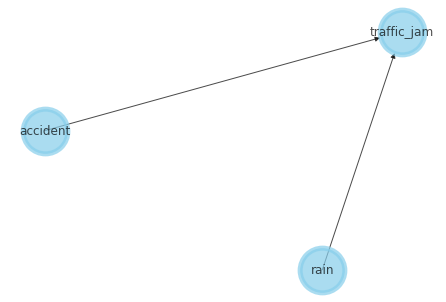

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(
    model,
    with_labels=True,
    node_size=2000, 
    node_color="skyblue", 
    node_shape="o", 
    alpha=0.7,
    linewidths=5
)
plt.show()

Now, we can run inference 

In [20]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

# Computing the probability of bronc given smoke.
q = inference.query(variables=["traffic_jam"], evidence={"rain": 0, "accident": 1})
print(q)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.6000 |
+----------------+--------------------+
| traffic_jam(1) |             0.4000 |
+----------------+--------------------+
